# Introduction to OpenCV

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interact_manual

In [2]:
#ls

In [3]:
# Load a color image in grayscale
img_gray = cv.imread('beach.JPG',0)    # this function does not throw an error if the path is not correct!
# TODO: Add information about the flags cv.IMREAD_COLOR, cv.IMREAD_GRAYSCALE and cv.IMREAD_UNCHANGED 

## Displaying images

In [4]:
# Displaying an image in an image window. The window will be sized according to the image
# Depending on the screen layout the window might be hidden behind your current working window!

cv.imshow('image',img_gray)   # the first argument is the window name
cv.waitKey(0)                 # the window will close after "x" milliseconds, if "0" it waits for any keystroke
cv.destroyAllWindows() 

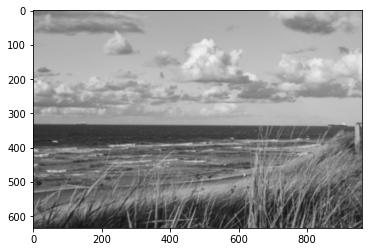

In [5]:
# Displaying an image with matplotlib
plt.imshow(img_gray, cmap = 'gray', interpolation = 'bicubic')      # TODO: explanation about interpolation
#plt.xticks([]), plt.yticks([])                                     # to hide tick values on X and Y axis
plt.show()

## Writing images

In [13]:
cv.imwrite('beachgray.png',img_gray)    # first argument is name of image, second is image
# TODO: Does cv.imwrite() overwrite exisiting files?
# TODO: What are the supported file formats for saving images?

True

## Creating binary images from grayscale image

In [8]:
# @interact                                     # running with interact is too slow
@interact_manual
def show_binary(thresh_val=(0,255,1)):
    _,thresh1 = cv.threshold(img_gray, thresh_val, 255,cv.THRESH_BINARY)
    plt.imshow(thresh1, cmap = 'gray', interpolation = 'bicubic') 
    plt.show()

interactive(children=(IntSlider(value=127, description='thresh_val', max=255), Button(description='Run Interac…